### AKSHAY | 202051018
### Assignment 8
### CS 312 : Data Analytics and Visualization

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [17]:
data = pd.read_csv("weight-height.csv")

In [18]:
print(data.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


Q1: Verify the Central Limit Theorem using the ”Height” feature of the data.

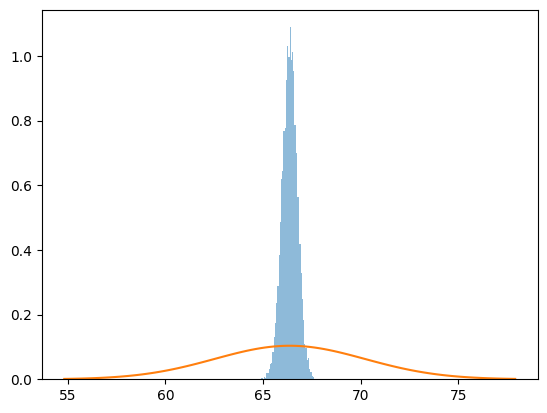

In [19]:
# Extract the height column as a numpy array
heights = data['Height'].values

# Set the sample size and number of simulations
sample_size = 100
num_simulations = 10000

# Initialize an array to store the sample means
sample_means = np.zeros(num_simulations)

# Loop over the number of simulations
for i in range(num_simulations):
    # Randomly sample heights with replacement
    sample = np.random.choice(heights, size=sample_size, replace=True)
    # Calculate the sample mean
    sample_mean = np.mean(sample)
    # Store the sample mean
    sample_means[i] = sample_mean

# Plot the distribution of sample means
plt.hist(sample_means, bins=50, density=True, alpha=0.5)

# Plot the normal distribution with the same mean and variance
mu = np.mean(heights)
sigma = np.std(heights)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x - mu)**2/(2*sigma**2))
plt.plot(x, y)

plt.show()

Q2: Perform the Bootstrap on ”Height” feature of the data.

In [20]:
values=data["Height"].to_numpy()

In [21]:
number_of_samples=10000 # R times
size_of_sample=300  # n
sample_mean=[]
for i in range(number_of_samples):
    # Calulate mean for n samples
    sample_mean.append(np.mean(np.random.choice(values,size_of_sample,replace=True)))

0.00222288864305714


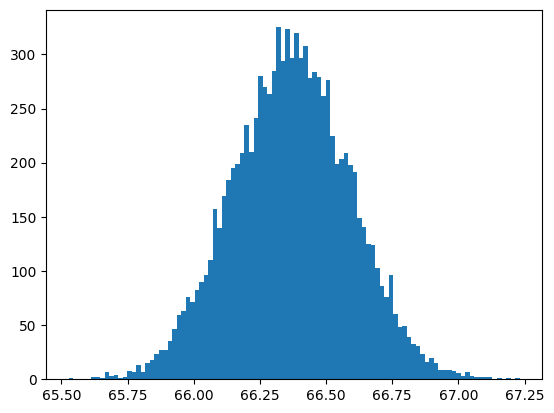

In [22]:
_=plt.hist(sample_mean,bins=100)
plt.show()
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
print(standard_error)

Q3: Calculate the Confidence Interval of 95 % using sample means derived using Bootstrap

In [23]:
CI=0.95
sorted_means=np.sort(sample_mean)
l=len(sorted_means)
idx=math.floor(l*((1-CI)/2))

print("Lower level :", sorted_means[idx])
print("Upper level :", sorted_means[l-idx-1])

Lower level : 65.936577467556
Upper level : 66.80201332043698
